In [ ]:
Graficas Tauc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Graficas Tauc y band Gap

* Juan Esteban Ospina
* Alejandra Echeverry
* Santiago Moreno

### Introducción

### Calculo del band gap

Perovskita


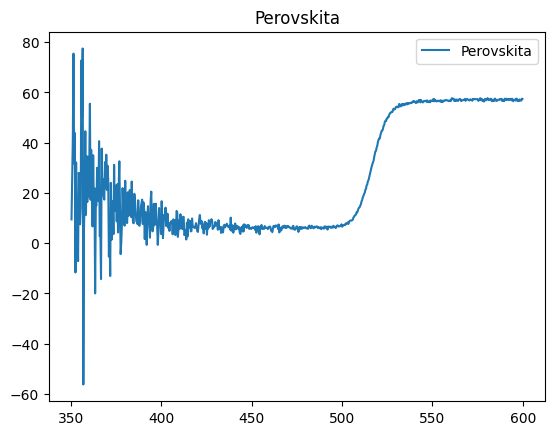

In [126]:
def reflectance(dark,reference,sample,a,b, name,plot = False):
    """Esta funcion lee los datos del espectrofotometro"""

    dark = dark[(dark['Wavelength']>=a )& (dark['Wavelength']<=b)]
    reference = reference[(reference['Wavelength']>=a) & (reference['Wavelength']<=b)]
    sample = sample[(sample['Wavelength']>=a ) & (sample['Wavelength']<=b)]
    dfnum = (sample['Intensity'] - dark['Intensity'])*100/(reference['Intensity'] - dark['Intensity'])
    if plot:
        plt.title(name)
        plt.plot(sample['Wavelength'],dfnum, label = name)
        plt.legend()
        plt.savefig("band_gap" + name + ".png")
    return dfnum,dark['Wavelength']
df_perovskitaD = pd.read_csv('clean_data/Perovskita.Master.dark.csv')
df_perovskitaR = pd.read_csv('clean_data/Perovskita.Master.reference.csv')
df_perovskitaS = pd.read_csv('clean_data/Perovskita.Master.sample.csv') 
reflectance(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,600,"Perovskita",True)
print("Perovskita")

TiO2


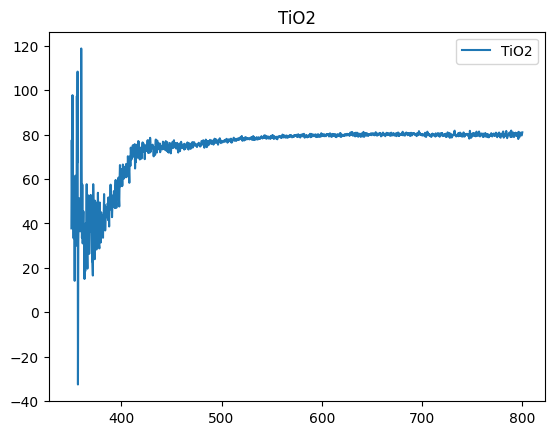

In [29]:
df_tio2D = pd.read_csv('clean_data/TiO2.Master.dark.csv')
df_tio2R = pd.read_csv('clean_data/TiO2.Master.reference.csv')
df_tio2S = pd.read_csv('clean_data/TiO2.Master.sample.csv')
reflectance(df_tio2D,df_tio2R,df_tio2S,350,800,"TiO2",True)
print("TiO2")

ZnO


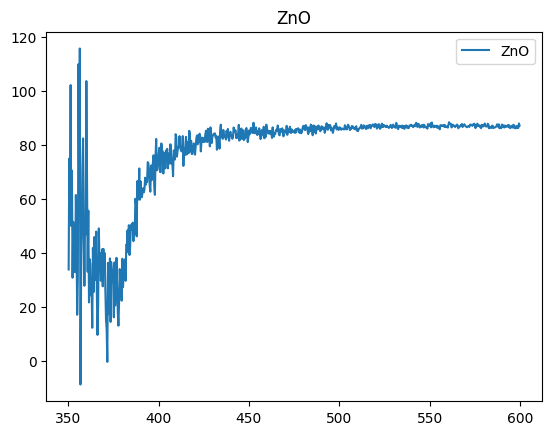

In [30]:
df_znoD = pd.read_csv('clean_data/ZnO.Master.dark.csv')
df_znoR = pd.read_csv('clean_data/ZnO.Master.reference.csv')
df_znoS = pd.read_csv('clean_data/ZnO.Master.sample.csv')
plot(df_znoD,df_znoR,df_znoS,350,600,"ZnO",True)
print("ZnO")

/home/ospina/Escritorio/Programacion/Python/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([3.53987716e-09, 3.53624247e-09, 3.53261525e-09, 3.52889501e-09,
        3.52528284e-09, 3.52157802e-09, 3.51798080e-09, 3.51439092e-09,
        3.51070895e-09, 3.50713389e-09, 3.50356611e-09, 3.49990677e-09,
        3.49635367e-09, 3.49280777e-09, 3.48917086e-09, 3.48563951e-09,
        3.48211530e-09, 3.47850061e-09, 3.47499082e-09, 3.47148810e-09,
        3.46789543e-09, 3.46440699e-09, 3.46092556e-09, 3.45745113e-09,
        3.45388744e-09, 3.45042711e-09, 3.44697371e-09, 3.44343158e-09,
        3.43999216e-09, 3.43655960e-09, 3.43313389e-09, 3.42962013e-09,
        3.42620823e-09, 3.42280312e-09, 3.41931046e-09, 3.41591904e-09,
        3.41253433e-09, 3.40915633e-09, 3.40569145e-09, 3.40232698e-09,
        3.39896914e-09, 3.39561793e-09, 3.39218050e-09, 3.38884266e-09,
        3.38551137e-09, 3.38218663e-09, 3.37877633e-09, 3.37546480e-09,
        3.37215975e-09, 3.36886116e-09, 3.36556903e-09, 3.36219214e-09,
        3.35891302e-09, 3.35564029e-09, 3.35237393e-09, 3.349113

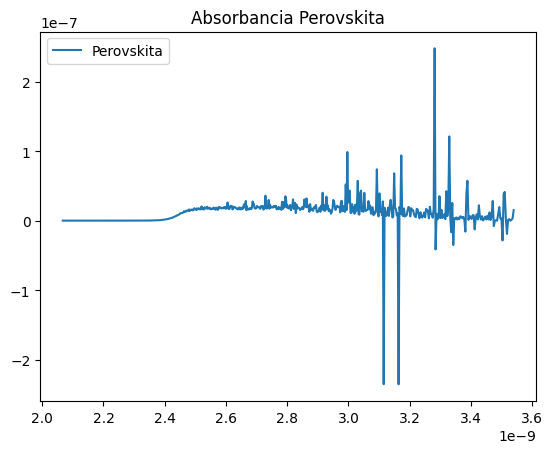

In [124]:
perovs_refelc = reflectance(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,600,"Perovskita")
h = 4.135667662e-15 #eV*s
c = 299792458 #m/s
def frec(wavelength):
    """Esta funcion calcula la frecuencia"""
    return c/wavelength
def plot_absorbance(reflec_array,wavelength,name,plot = False,plot2 = False):
    """Esta funcion grafica la absorbancia"""
    df_absorbance = np.log(100/reflec_array)
    F = (1-reflec_array)**2/(2*reflec_array) #Kubelka-Munk function
    y = F*c/wavelength*h
    if plot:
        plt.title(name)
        plt.plot(wavelength,df_absorbance, label = name)
        plt.title("Absorbancia "+name)
        plt.legend()
        plt.savefig("band_gap" + name + ".png")
    
    if plot2:
        plt.title(name)
        plt.plot(frec(wavelength)*h,y, label = name)
        plt.title("Absorbancia "+name)
        plt.legend()
        plt.savefig("band_gap" + name + ".png")
    return np.array(frec(wavelength)*h),np.array(y)
plot_absorbance(perovs_refelc[0],perovs_refelc[1],"Perovskita",False,True)

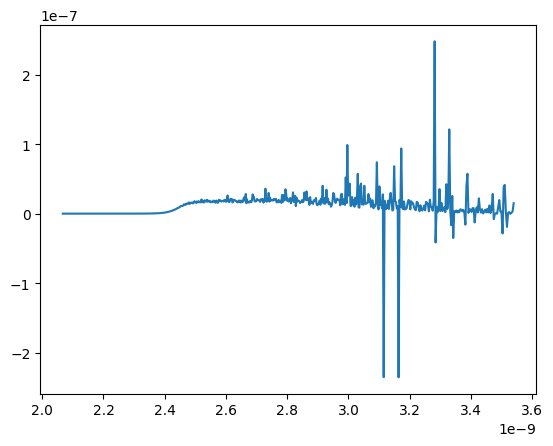

In [125]:
gamma = 2
x = plot_absorbance(perovs_refelc[0],perovs_refelc[1],"Perovskita",False,False)[0]
y = plot_absorbance(perovs_refelc[0],perovs_refelc[1],"Perovskita",False,False)[1]

def recorte(x,y,gamma,a,b,name):
    filtro = (x > a) & (x < b)
    x = x[filtro]
    y = y[filtro]
    m,inter = np.polyfit(x,y,1)
    intercepto_x = -inter/m
    plt.plot(x,m*x+inter)
    plt.plot(x,y)
    plt.scatter(intercepto_x,0)
    plt.title("band gap {} = {}".format(name,intercepto_x))
    return intercepto_x
plt.plot(x,y)

Perovskita


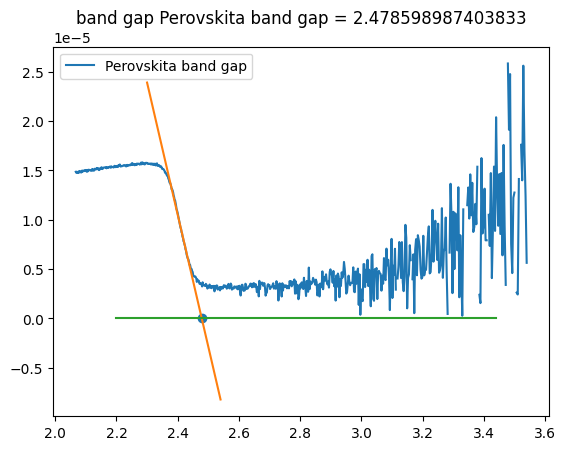

In [19]:
def bandas(dark,reference,sample,a,b, name,gamma,xmin,xmax,plot = False):
    """Esta funcion lee los datos del espectrofotometro"""
    h = 4.135667662e-15 #eV*s
    c = 299792458 #m/s
    dark = dark[(dark['Wavelength']>=a )& (dark['Wavelength']<=b)]
    reference = reference[(reference['Wavelength']>=a) & (reference['Wavelength']<=b)]
    sample = sample[(sample['Wavelength']>=a ) & (sample['Wavelength']<=b)]
    reflectancia = (sample['Intensity'] - dark['Intensity'])*100/(reference['Intensity'] - dark['Intensity'])
    F = (1-reflectancia)**2/(2*reflectancia) #Kubelka-Munk function
    wave = sample['Wavelength']*1e-9
    x = c/wave*h
    y = (F*c/sample['Wavelength']*h)**(1/gamma)

    if plot:
        plt.title(name)
        plt.plot(x,y, label = name)
        plt.legend()
        plt.savefig("band_gap" + name + ".png")
    filtro = (x > xmin) & (x < xmax)
    x = x[filtro]
    y = y[filtro]
    m,inter = np.polyfit(x,y,1)
    intercepto_x = -inter/m
    x = np.linspace(xmin-0.1,xmax+0.1,len(y))
    plt.plot(x,m*x+inter)
    plt.plot([xmin-0.2,xmax+1],[0,0])
    plt.scatter(intercepto_x,0)
    plt.title("band gap {} = {}".format(name,intercepto_x))
    
    return True


df_perovskitaD = pd.read_csv('clean_data/Perovskita.Master.dark.csv')
df_perovskitaR = pd.read_csv('clean_data/Perovskita.Master.reference.csv')
df_perovskitaS = pd.read_csv('clean_data/Perovskita.Master.sample.csv') 
bandas(df_perovskitaD,df_perovskitaR,df_perovskitaS,200,600,"Perovskita band gap",3/2,2.4,2.44,True)
print("Perovskita")

In [139]:
(c/600e-9)*h

2.066403289770155